<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Сравнение-предсказаний-классических-моделей-машинного-обучения-и-нейронной-сети-Keras.-На-искуственных-данных." data-toc-modified-id="Сравнение-предсказаний-классических-моделей-машинного-обучения-и-нейронной-сети-Keras.-На-искуственных-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Сравнение предсказаний классических моделей машинного обучения и нейронной сети Keras. На искуственных данных.</a></span></li><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Разбиение-на-выборки" data-toc-modified-id="Разбиение-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разбиение на выборки</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#CATBOOST" data-toc-modified-id="CATBOOST-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CATBOOST</a></span></li><li><span><a href="#Keras" data-toc-modified-id="Keras-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Keras</a></span></li><li><span><a href="#Визуальное-сравнение-предсказаний" data-toc-modified-id="Визуальное-сравнение-предсказаний-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Визуальное сравнение предсказаний</a></span></li><li><span><a href="#Таблица-сравнений-RMSE" data-toc-modified-id="Таблица-сравнений-RMSE-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Таблица сравнений RMSE</a></span></li></ul></div>

## Сравнение предсказаний классических моделей машинного обучения и нейронной сети Keras. На искуственных данных.

## Импорт данных

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train_data_n.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 101 entries, 0 to target
dtypes: float64(101)
memory usage: 789.2 KB


In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,-0.64,-0.52,0.11,-0.69,0.00,-0.76,-0.18,-0.75,-0.74,-0.50,...,1.12,-0.23,-0.63,-0.38,1.73,0.03,-0.12,-0.20,-0.11,3.64
1,-0.68,-0.43,0.33,0.14,0.07,1.61,0.65,0.17,1.23,-0.41,...,-1.63,0.18,-0.49,0.13,-0.13,0.54,-0.03,0.33,-0.48,6.59
2,-1.00,-0.39,0.38,0.15,0.83,0.54,-1.36,-0.91,-0.94,2.50,...,-1.19,0.24,-0.69,1.39,0.45,0.65,-1.19,-0.38,-0.47,2.08
3,0.18,0.91,1.39,0.33,-1.57,-0.35,0.69,0.30,-1.04,1.12,...,1.30,0.83,0.81,0.93,0.99,0.51,-1.13,-1.13,1.69,5.97
4,-0.34,0.86,-0.23,-0.52,-0.14,0.00,1.31,0.18,-1.57,-0.50,...,-1.82,-0.15,2.13,-0.27,1.24,1.26,-0.68,0.06,-0.16,1.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.78,0.58,1.61,0.14,-1.56,-1.78,-1.14,0.32,-1.97,-0.92,...,1.28,1.62,0.00,-0.50,-0.74,0.15,0.51,-0.47,0.64,-0.38
996,0.58,0.83,0.08,-0.45,-0.54,0.90,0.22,0.50,-0.06,-1.53,...,-0.53,-1.00,0.59,-0.08,0.66,-1.74,-0.34,-1.02,-0.50,0.18
997,-1.37,1.86,-0.39,-0.16,2.71,-1.00,-0.93,0.99,-2.65,-1.54,...,1.60,0.25,0.84,0.25,1.52,0.59,0.45,0.56,0.50,-0.34
998,-0.58,-0.64,0.32,-0.39,-0.15,1.17,-0.01,-0.38,-1.36,0.26,...,-0.68,0.97,0.25,-0.13,0.60,-1.40,-1.21,-1.44,0.11,0.15


In [69]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,1.000000,-0.026747,0.053773,-0.032165,-0.027712,-0.004220,-0.013720,0.001714,-0.024947,-0.003876,...,0.037861,-0.006154,0.001750,0.038399,-0.015447,-0.009909,0.028896,0.031652,0.063791,0.034867
1,-0.026747,1.000000,-0.006370,-0.077216,-0.057870,-0.047168,-0.037762,0.019602,0.019831,0.020246,...,-0.026441,0.035109,0.027562,-0.008831,0.023614,-0.009486,-0.019470,0.029425,0.056527,0.032034
2,0.053773,-0.006370,1.000000,0.033666,0.055489,0.028803,0.001737,-0.048417,0.012201,0.005522,...,-0.001862,0.045626,-0.064381,0.009509,0.021356,-0.004313,-0.008388,-0.008267,0.009883,-0.021267
3,-0.032165,-0.077216,0.033666,1.000000,0.035860,-0.048053,0.039082,-0.003684,-0.057804,-0.047197,...,-0.031184,-0.000548,0.003529,0.018730,-0.004011,0.025858,-0.017367,0.009593,0.006432,-0.015035
4,-0.027712,-0.057870,0.055489,0.035860,1.000000,-0.003923,-0.001491,0.018526,-0.012585,-0.017869,...,0.005088,0.017364,0.027045,0.028425,-0.006890,-0.016349,0.030610,-0.003905,-0.028587,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.009909,-0.009486,-0.004313,0.025858,-0.016349,-0.036802,-0.019605,0.041044,-0.010987,0.022955,...,-0.021892,0.035174,-0.047216,-0.015014,0.065025,1.000000,0.003232,0.052938,0.039726,-0.030800
97,0.028896,-0.019470,-0.008388,-0.017367,0.030610,-0.007651,-0.046911,0.026068,-0.032127,0.003014,...,-0.026744,0.070943,-0.059110,-0.003568,0.005782,0.003232,1.000000,0.039411,-0.005537,-0.009771
98,0.031652,0.029425,-0.008267,0.009593,-0.003905,0.019005,0.005265,0.027473,0.038962,0.010228,...,0.005306,0.029157,-0.053280,0.001596,-0.024289,0.052938,0.039411,1.000000,-0.030935,-0.014953
99,0.063791,0.056527,0.009883,0.006432,-0.028587,0.015483,-0.004362,-0.011805,-0.000859,-0.001874,...,-0.016795,0.009977,-0.010557,0.008224,0.024335,0.039726,-0.005537,-0.030935,1.000000,-0.006540


In [74]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.016520,-0.005710,-0.045090,-0.030040,0.037950,-0.007690,-0.046210,0.057530,-0.00237,-0.005440,...,0.036200,-0.034220,0.005150,0.035930,-0.013390,-0.014710,-0.027760,0.045190,0.033870,1.155400
std,1.030162,1.008872,0.979941,0.983729,0.962812,1.014145,0.985427,0.974912,1.02568,0.994513,...,1.006782,1.010199,1.013625,1.002231,1.011455,0.991696,0.994886,0.980632,0.983543,2.808762
min,-3.540000,-3.510000,-2.990000,-3.750000,-2.900000,-3.290000,-3.270000,-3.070000,-3.47000,-3.400000,...,-2.750000,-3.220000,-3.370000,-2.810000,-3.290000,-3.130000,-3.880000,-2.980000,-2.410000,-6.350000
25%,-0.742500,-0.682500,-0.690000,-0.642500,-0.620000,-0.680000,-0.685000,-0.600000,-0.65000,-0.740000,...,-0.660000,-0.710000,-0.740000,-0.610000,-0.650000,-0.702500,-0.720000,-0.620000,-0.660000,-0.672500
50%,-0.030000,-0.075000,-0.070000,-0.040000,0.070000,-0.030000,-0.070000,0.080000,-0.00000,-0.030000,...,0.030000,-0.035000,0.010000,0.000000,0.000000,0.015000,-0.030000,0.055000,0.030000,1.070000
75%,0.650000,0.670000,0.540000,0.612500,0.642500,0.720000,0.630000,0.740000,0.67250,0.690000,...,0.720000,0.660000,0.652500,0.692500,0.630000,0.650000,0.680000,0.700000,0.700000,3.020000
max,3.370000,3.350000,4.180000,3.000000,3.190000,2.920000,3.450000,2.900000,3.10000,3.190000,...,3.400000,3.400000,3.530000,3.290000,3.270000,3.370000,2.920000,3.260000,3.240000,11.720000


Данные совершенно искуственны, корреляций target с каким либо значением не наблюдается, следует ожидать плохое качество предсказаний.

## Разбиение на выборки

In [5]:
x = data.drop('target', axis=1)
y = data['target'] 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.05, shuffle=True, random_state=12345)

In [8]:
x_test.index

Int64Index([144, 833, 270, 468, 962, 186, 942, 516, 286, 458, 890, 957, 604,
            504, 474, 517, 173, 250, 967, 743, 258,  41, 719, 322, 911, 937,
            352, 795, 435, 521, 777, 593, 150, 138, 314, 725,   0, 884, 198,
            700, 912, 304, 883, 370, 199, 262,  73, 266, 732, 308],
           dtype='int64')

In [9]:
x_train.shape

(950, 100)

## Линейная регрессия

In [10]:
# подключение sklearn
from sklearn.linear_model import LinearRegression 

In [11]:
from sklearn.metrics import mean_squared_error as msem

In [12]:
# создание модель
model_lr = LinearRegression()

In [13]:
# обучить модель
model_lr.fit(x_train, y_train)

LinearRegression()

In [14]:
predict_lr = model_lr.predict(x_test)

In [15]:
predict_lr

array([-0.19805656,  3.16914732,  3.45800459, -0.37194269,  1.78115023,
       -0.1598384 ,  2.38436904,  1.0469456 , -1.89908073,  1.5188598 ,
        0.25667202,  0.56189888, -0.53623915,  2.62954905,  3.17983636,
        1.39769666,  0.79686598, -0.18828131,  1.80651402, -1.01718588,
        0.25075582,  2.18063906,  0.72007235,  1.15963906,  2.43913524,
        2.28499063,  1.16684966, -0.2284478 , -0.84849526,  0.09980271,
        2.39285449,  0.86786254,  1.3562017 ,  1.99687241, -0.83061563,
        0.64791497,  1.66384238,  2.4616564 ,  1.50157392,  2.19888384,
        1.5305197 ,  2.4644308 , -0.23921654,  1.47801654,  2.55872479,
        0.98047342,  1.78995106,  2.60030543,  2.45289067,  2.88952302])

In [16]:
result_lr = round(msem(y_test, predict_lr)**0.5, 2)
print('RMSE LR: ', result_lr)

RMSE LR:  2.99


## CATBOOST

In [17]:
from catboost import CatBoostRegressor

In [18]:
model_cr = CatBoostRegressor(silent=True)
model_cr.fit(x_train, y_train)
predictions_valid_cr = model_cr.predict(x_test) # получим предсказания модели на валидационной выборке
result_cr = round(msem(y_test, predictions_valid_cr)**0.5, 2)
print('RMSE CatBoostRegressor: ', result_cr)# RMSE

RMSE CatBoostRegressor:  2.79


## Keras

In [57]:
# подключение Keras
from tensorflow import keras

In [58]:
# создание модели
model_k = keras.models.Sequential()

In [59]:
# параметры нейронной сети
n = 5 # Задаем количество нейронов в слое - как бы количество маленьких регрессий
#- потом можно будет усреднить 
# усреднение даст повторимость результатов
# но для текущих данных усреднение сремится к нулю поэтому адекватные результаты до 10 слоев
# но опять же это касается искуственных данных конкретной таблицы
# на реальных данных количество слоев и дальнейшее усреднение возможно повысит качество предсказаний
model_k.add(keras.layers.Dense(units=n, input_dim=x_train.shape[1]))

In [60]:
# как обучается нейронная сеть
model_k.compile(loss='mean_squared_error', optimizer='sgd')

In [61]:
# обучить модель
model_k.fit(x_train, y_train) 

30/30 [==============================] - 1s 3ms/step - loss: 10.5939


In [62]:
predict_k = (model_k.predict(x_test)).tolist()

2/2 [==============================] - 0s 5ms/step


In [63]:
predict_k_mean =[]
for i in predict_k:
    mean1 = sum(i)/n
    predict_k_mean.append(mean1)

In [64]:
result_k = round(msem(y_test, predict_k_mean)**0.5, 2)
print('RMSE Keras: ', result_k)

RMSE Keras:  2.94


In [65]:
#predict_k_mean = sum(predict_k_mean, [])

## Визуальное сравнение предсказаний

In [66]:
import matplotlib.pyplot as plt

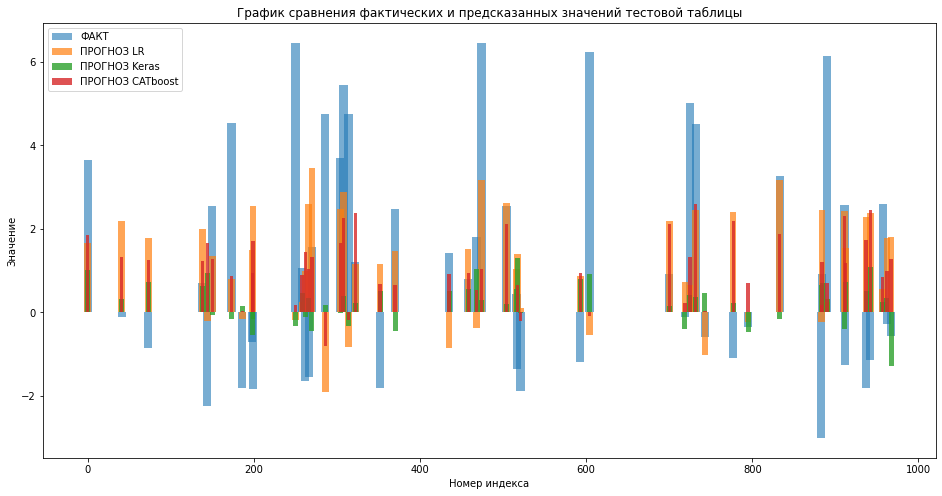

In [67]:
index = x_test.index.tolist()
values1 = y_test.tolist()
values2 = predict_lr.tolist()
values3 = predict_k_mean
values4 = predictions_valid_cr.tolist()
plt.figure(figsize=(16, 8))
plt.title('График сравнения фактических и предсказанных значений тестовой таблицы')
plt.bar(index, values1, alpha=0.6, label='ФАКТ', width=10)
plt.bar(index, values2, alpha=0.7, label='ПРОГНОЗ LR', width=8)
plt.bar(index, values3, alpha=0.8, label='ПРОГНОЗ Keras', width=6)
plt.bar(index, values4, alpha=0.8, label='ПРОГНОЗ CATboost', width=4)
plt.legend()
plt.xlabel('Номер индекса')
plt.ylabel('Значение')
plt.show();

## Таблица сравнений RMSE

In [68]:
compare = pd.DataFrame(data=[['RMSE', result_cr, result_lr, result_k]],
                   columns=['Параметр','CatBoostRegressor', 'LeniarRegressor','Keras'])
display(compare)

,Параметр,CatBoostRegressor,LeniarRegressor,Keras
0,RMSE,2.79,2.99,2.94
